# Test player-wise Metropolis sampling with a lower scaling factor for the logistic function for TI9 again.

This will result in the prior becoming less informative.

## Setup

In [1]:
import os
import sys

os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import load, munge
import src.models.gp

In [3]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

## Load data.

In [4]:
matches = load.all_matches_df()

In [5]:
matches_ti9 = matches.loc[matches.league_name == "The International 2019"]
matches_ti9.shape

(268, 15)

In [6]:
players_mat_ti9 = munge.make_match_players_matrix(
    matches_ti9.radiant_players, matches_ti9.dire_players)
players_mat_ti9.shape

(268, 240)

## Get a list of player IDs.

In [7]:
players = munge.player_id_to_player_name(
    pd.concat([matches_ti9.radiant_players, matches_ti9.dire_players]),
    pd.concat([matches_ti9.radiant_nicknames, matches_ti9.dire_nicknames]),
    pd.concat([matches_ti9.radiant_valveId, matches_ti9.dire_valveId]),
    pd.concat([matches_ti9.radiant_name, matches_ti9.dire_name]),)

In [8]:
players.loc[players_mat_ti9.columns[:5]]

,name,team,team_id
3916428,EGM,Bald,7237270
3940262,March,Team Jinesbrus,7225724
4281729,syndereN,Anti-MagE-,7247587
6922000,pieliedie,Forward Gaming,6214538
10366616,Sneyking,Forward Gaming,6214538


## Run model manually.

In [9]:
two_years_in_ms = 2 * 365 * 24 * 60 * 60 * 1000

In [10]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

In [12]:
gp = src.models.gp.SkillsGP(players_mat_ti9.values,
                            matches_ti9.startTimestamp.values,
                            matches_ti9.radiantVictory,
                            players_mat_ti9.columns.values,
                            "exponential", {"scale": two_years_in_ms * 10},
                            propose_sd=0.1, logistic_scale=1,
                            save_every_n_iter=10)

In [13]:
gp.iterate_once_player_wise()

In [14]:
gp.samples

[(0, [array([-0.01159234, -0.14079464, -0.00837074, -0.2749475 , -0.13401652,
           0.0764702 ,  0.00461717], dtype=float128),
   array([-0.01217529,  0.03911276,  0.00624152, -0.03775639, -0.06508065,
           0.05127202,  0.07173807,  0.01745305,  0.11172741, -0.19405036,
           0.0550421 , -0.02151282,  0.0305366 , -0.18908588,  0.02170908,
           0.11304979,  0.04325944,  0.01900453, -0.10181755], dtype=float128),
   array([-0.01987162,  0.02196622,  0.0630574 , -0.0606981 , -0.12938253,
           0.05348526,  0.05931637, -0.02588702,  0.21326464], dtype=float128),
   array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         dtype=float128),
   array([-0.02944549, -0.04363642,  0.12179902, -0.00365681,  0.18685201,
          -0.05575744, -0.24290894,  0.01177303,  0.05753165,  0.0936565 ,
          -0.07349514, -0.08600468,  0.11644965,  0.03534824,  0.11453846],
         dtype=float128),
   array([-0.11109991,  0.12955892,  0.02718394, -0.0605439

### 100 player-wise iterations.

In [15]:
gp.iterate(100, "playerwise")

100% (100 of 100) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


Text(0.5, 1.0, 'Radiant advantage')

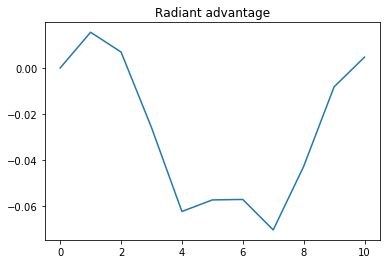

In [16]:
plt.plot([x[2] for x in gp.samples])
plt.title("Radiant advantage")

Text(0.5, 1.0, 'log-likelihood')

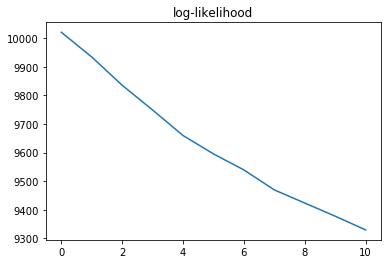

In [17]:
plt.plot([x[3] for x in gp.samples])
plt.title("log-likelihood")

In [18]:
[[x[0], x[2], x[3]] for x in gp.samples[1:]]

[[10, 0.015543206381091924, 9933.948593399855767],
 [20, 0.006936706970197784, 9835.237016595824553],
 [30, -0.025892727193910604, 9748.694574256763771],
 [40, -0.06241909979870569, 9659.590784040506228],
 [50, -0.05739047941513986, 9595.406359539477751],
 [60, -0.05719007864258486, 9539.337417522452502],
 [70, -0.07044057454952864, 9469.576687792909066],
 [80, -0.0428240634692397, 9423.660008597762502],
 [90, -0.008201808983045917, 9377.755430070517879],
 [100, 0.00472327177877766, 9329.810377149539868]]

### 1,000 iterations.

In [19]:
gp.iterate(1000, "playerwise")

100% (1000 of 1000) |####################| Elapsed Time: 0:00:34 Time:  0:00:34


In [22]:
[[x[0], x[2], x[3]] for x in gp.samples[-5:]]

[[1060, -0.04420493323937181, 8726.127763902161059],
 [1070, -0.020728432805266112, 8727.8498946139384245],
 [1080, -0.016682185455153882, 8716.867730967363369],
 [1090, -0.025220741684919952, 8708.993121860433309],
 [1100, -0.038914792178099546, 8739.710156971697985]]

Text(0.5, 1.0, 'Radiant advantage')

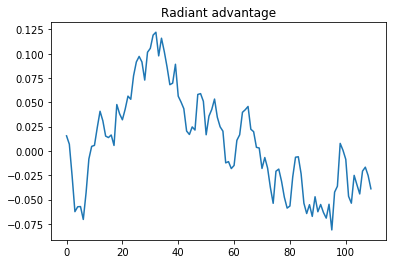

In [23]:
plt.plot([x[2] for x in gp.samples[1:]])
plt.title("Radiant advantage")

Text(0.5, 1.0, 'log-likelihood')

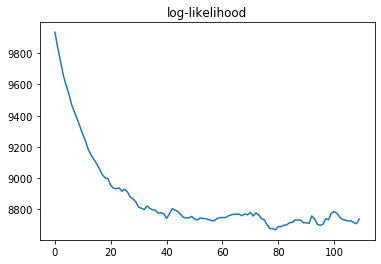

In [24]:
plt.plot([x[3] for x in gp.samples[1:]])
plt.title("log-likelihood")

6031.464347448102

Text(0.5, 1.0, 'log-posterior')

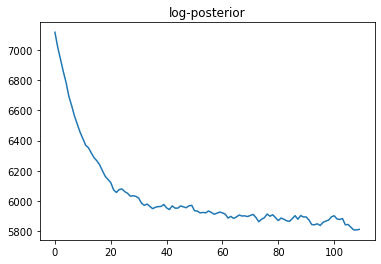

In [46]:
display(np.mean([x[3] for x in gp.samples[1:]]))
plt.plot([x[3] for x in gp.samples[1:]])
plt.title("log-posterior")

## What are skill levels after fitting?

In [25]:
def skill_vecs_to_mat(skill_vec_list, player_skill_vecs):
    res = [gp._expand_sparse_player_vec(player_skill_vecs[k][0].transformed(skill_vec_list[k]),
                                        player_skill_vecs[k][1])
           for k in range(len(skill_vec_list))]
    return np.array(res).T

In [26]:
samples = [np.array(skill_vecs_to_mat(x[1], gp.player_skill_vecs))
           for x in gp.samples[-100::10]]

In [29]:
skills = pd.DataFrame(
    np.mean(samples, axis=0),
    columns=pd.MultiIndex.from_arrays(
        [players.loc[players_mat_ti9.columns, "team"],
        players.loc[players_mat_ti9.columns, "name"]])
)

In [30]:
skills

team Bald Team Jinesbrus Anti-MagE- Forward Gaming           Team Spirit  \
name  EGM          March   syndereN      pieliedie  Sneyking     VANSKOR   
0     NaN            NaN        NaN       0.749939  0.240907         NaN   
1     NaN            NaN        NaN       0.751396  0.240017         NaN   
2     NaN            NaN        NaN       0.751275  0.236749         NaN   
3     NaN            NaN        NaN       0.752815  0.235788         NaN   
4     NaN            NaN        NaN            NaN       NaN         NaN   
5     NaN            NaN        NaN            NaN       NaN         NaN   
6     NaN            NaN        NaN            NaN       NaN         NaN   
7     NaN            NaN        NaN            NaN       NaN         NaN   
8     NaN            NaN        NaN            NaN       NaN         NaN   
9     NaN            NaN        NaN            NaN       NaN         NaN   
10    NaN            NaN        NaN            NaN       NaN         NaN   
11    NaN            NaN        NaN            NaN       NaN         NaN   
12    NaN            NaN        NaN            NaN       NaN         NaN   
13    NaN            NaN        NaN            NaN       NaN         NaN   
14    NaN            NaN        NaN            NaN       NaN         NaN   
15    NaN            NaN        NaN            NaN       NaN         NaN   
16    NaN            NaN        NaN            NaN       NaN         NaN   
17    NaN            NaN        NaN            NaN       NaN         NaN   
18    NaN            NaN        NaN            NaN       NaN         NaN   
19    NaN            NaN        NaN            NaN       NaN         NaN   
20    NaN            NaN        NaN            NaN       NaN         NaN   
21    NaN            NaN        NaN            NaN       NaN         NaN   
22    NaN            NaN        NaN       0.760815  0.240979         NaN   
23    NaN            NaN        NaN       0.760337  0.241207         NaN   
24    NaN            NaN        NaN            NaN       NaN         NaN   
25    NaN            NaN        NaN       0.764328  0.238065         NaN   
26    NaN            NaN        NaN            NaN       NaN         NaN   
27    NaN            NaN        NaN       0.762041  0.242487         NaN   
28    NaN            NaN        NaN            NaN       NaN         NaN   
29    NaN            NaN        NaN            NaN       NaN         NaN   
..    ...            ...        ...            ...       ...         ...   
238   NaN            NaN        NaN            NaN       NaN         NaN   
239   NaN            NaN        NaN            NaN       NaN   -0.299230   
240   NaN            NaN        NaN            NaN       NaN         NaN   
241   NaN            NaN        NaN            NaN       NaN         NaN   
242   NaN            NaN        NaN            NaN       NaN         NaN   
243   NaN            NaN        NaN            NaN       NaN   -0.297777   
244   NaN            NaN        NaN            NaN       NaN         NaN   
245   NaN            NaN        NaN            NaN       NaN         NaN   
246   NaN            NaN        NaN            NaN       NaN         NaN   
247   NaN            NaN        NaN            NaN       NaN         NaN   
248   NaN            NaN        NaN            NaN       NaN         NaN   
249   NaN            NaN        NaN            NaN       NaN         NaN   
250   NaN       0.055134        NaN            NaN       NaN         NaN   
251   NaN            NaN        NaN            NaN       NaN         NaN   
252   NaN            NaN        NaN            NaN       NaN   -0.299642   
253   NaN            NaN        NaN            NaN       NaN         NaN   
254   NaN            NaN        NaN            NaN       NaN         NaN   
255   NaN            NaN        NaN            NaN       NaN         NaN   
256   NaN       0.058173        NaN            NaN       NaN         NaN   
257   NaN            NaN        NaN            N

In [33]:
skills.mean().sort_values(ascending=False)

team                  name            
CDEC                  James               1.586287
Natus Vincere         Zayac               1.262330
Infamous Gaming       Scofield            1.220138
Royal Never Give Up   Setsu               1.174497
J.Storm               Fear                1.170395
Kookaburra            ritsu               1.097607
Hippomaniacs          Muf                 1.092992
AMPLFY                Jeyo                1.072027
Team Aster            BoBoKa              0.972875
Infamous Gaming       Unknown             0.929222
six eight two         zipzap              0.872671
paiN Gaming           Unknown             0.864952
Thunder Predator                          0.832394
Royal Never Give Up   old LaNm            0.815805
Chaos Esports Club    MiLAN               0.814284
paiN Gaming           4dr                 0.800773
Black Sheep!          zero                0.799201
Unknown Radiant Team  Peksu               0.772395
Forward Gaming        pieliedie           0

In [34]:
skills.mean().sort_values().reset_index().groupby("team").sum().sort_values(0, ascending=False)

,0
team,
Forward Gaming,2.709597
Infamous Gaming,2.085245
CDEC,1.841187
Mineski,1.755065
Team Jinesbrus,1.752783
Royal Never Give Up,1.697456
paiN Gaming,1.530867
Chaos Esports Club,1.281264
Vega Squadron,1.207541


In [55]:
src.models.gp.win_prob(2.768053 - 0.985228, 1)

0.8560453457742657

### Visualise variance.

In [56]:
idx1 = skills.columns.get_level_values("team") == "Infamous Gaming"

In [57]:
idx2 = skills.columns.get_level_values("team") == "paiN Gaming"

Text(0.5, 1.0, 'Infamous Gaming')

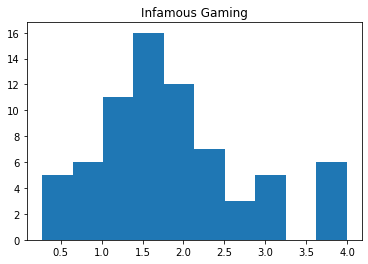

In [60]:
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1)) for x in samples[20:]])
plt.title("Infamous Gaming")

Text(0.5, 1.0, 'paiN Gaming')

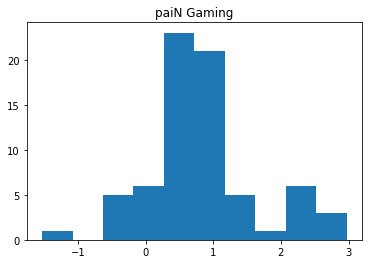

In [61]:
plt.hist([np.nanmean(np.sum(x[:, idx2], axis=1)) for x in samples[20:]])
plt.title("paiN Gaming")

1.027339789671198

Text(0.5, 1.0, 'Infamous vs paiN Gaming')

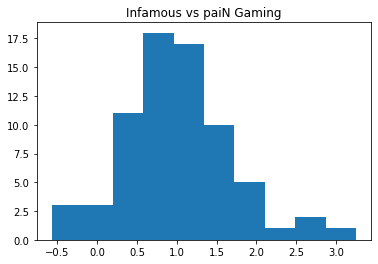

In [62]:
display(np.mean([np.nanmean(np.sum(x[:, idx1], axis=1) - np.sum(x[:, idx2], axis=1)) for x in samples[20:]]))
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1) - np.sum(x[:, idx2], axis=1)) for x in samples[20:]])
plt.title("Infamous vs paiN Gaming")

## Play with some win probabilities.

In [65]:
src.models.gp.win_prob(2, 1)

0.8807970779778823